## Iteration 1: Base + Playing with UI

In [2]:
#| default_exp graph

In [22]:
#| export 
class Author:
    def __init__(self, first, middle, last, email=None, publications=[]):
        self.first = first
        self.middle = middle
        self.last = last
        self.email = email
        self.publications = publications

In [4]:
author = Author('Nicole', 'F', 'Brewer')
author

In [5]:
#| export 
import pprint

Okay, let's write out this function first before making it part of the class.

In [6]:
def __repr__(self):
    return pprint.pformat(vars(self))

In [7]:
pprint.pformat(vars(author))

"{'email': None,\n 'first': 'Nicole',\n 'last': 'Brewer',\n 'middle': 'F',\n 'publications': []}"

In [8]:
print(__repr__(author))

{'email': None,
 'first': 'Nicole',
 'last': 'Brewer',
 'middle': 'F',
 'publications': []}


That looks good! We won't use this for our app, but it's handy to see when we're developing.

## patch

In order to add this function to the author object without having to return to a prior cell, we need to use a handy fastai utility. Let's see how that works. We will need to import the `@patch` decorator which tells tells the notebook processor that the function we write is intended to extend a class.

In [9]:
#| export
from fastcore.basics import patch

Patch

In [10]:
#| export
# two things need to be added to create a patch for Author
@patch
def __repr__(self:Author):
    return pprint.pformat(vars(self))

Great job! We should start by creating a few `Author` objects. In the process we can verify that our patch worked.

In [11]:
a1 = Author('A', 'B', 'Carlson', publications = [1,2,3])
a2 = Author('B', 'C', 'Dawson', publications = [3, 4, 5 ,6])
a3 = Author('C', 'D', 'Elfson', publications = [1, 5, 7, 8])
a4 = Author('D', 'E', 'Fitzgerald', publications = [1, 5, 9, 10])
a5 = Author('E', 'F', 'Gerard', publications = [4, 11, 12])
a5

{'email': None,
 'first': 'E',
 'last': 'Gerard',
 'middle': 'F',
 'publications': [4, 11, 12]}

In [12]:
authors = [a1, a2, a3, a4, a5]

Now let's use NetworkX to create a graph `G`.

In [13]:
import networkx as nx

G = nx.Graph()

Now let's add our `Author` objects as nodes on the graph. We can add nodes individually.

In [14]:
G.add_node(a1)

Or with any iterable (like a list) with the function `add_nodes_from`.

In [15]:
G.add_nodes_from(authors)

**Note**: if you add the same node or edge more than once, NetworkX quietly ignores any that are already present. That's good for us.

Let's see what we have so far.

In [16]:
G.nodes

NodeView(({'email': None,
 'first': 'A',
 'last': 'Carlson',
 'middle': 'B',
 'publications': [1, 2, 3]}, {'email': None,
 'first': 'B',
 'last': 'Dawson',
 'middle': 'C',
 'publications': [3, 4, 5, 6]}, {'email': None,
 'first': 'C',
 'last': 'Elfson',
 'middle': 'D',
 'publications': [1, 5, 7, 8]}, {'email': None,
 'first': 'D',
 'last': 'Fitzgerald',
 'middle': 'E',
 'publications': [1, 5, 9, 10]}, {'email': None,
 'first': 'E',
 'last': 'Gerard',
 'middle': 'F',
 'publications': [4, 11, 12]}))

In [31]:
#| export

for index_a in range(len(authors)):
    for index_b in range(index_a + 1, len(authors)):
        author_a = authors[index_a]
        author_b = authors[index_b]
        
        for publication_a in author_a.publications:
            for publication_b in author_b.publications:
                if publication_a == publication_b:
                    G.add_edge(author_a, author_b)
                    print(f"Match found between a{index_a+1} and a{index_b+1} for publication {publication_a}")

Match found between a1 and a2 for publication 3
Match found between a1 and a3 for publication 1
Match found between a1 and a4 for publication 1
Match found between a2 and a3 for publication 5
Match found between a2 and a4 for publication 5
Match found between a2 and a5 for publication 4
Match found between a3 and a4 for publication 1
Match found between a3 and a4 for publication 5


In [33]:
#G.edges

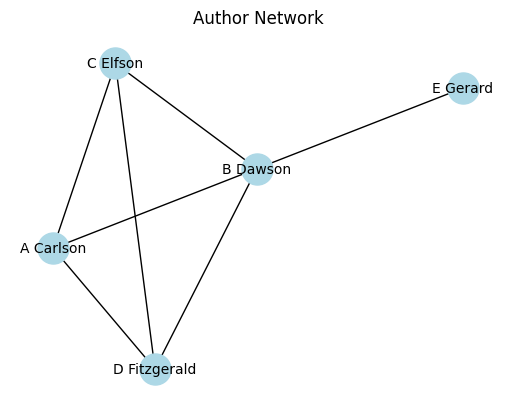

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes to the graph
for author in authors:
    G.add_node(author)

# Add edges to the graph based on publication matches
for index_a in range(len(authors)):
    for index_b in range(index_a + 1, len(authors)):
        author_a = authors[index_a]
        author_b = authors[index_b]

        for publication_a in author_a.publications:
            for publication_b in author_b.publications:
                if publication_a == publication_b:
                    G.add_edge(author_a, author_b)

# Create the visualization
pos = nx.spring_layout(G)  # Define the layout for node positioning
labels = {author: f"{author.first} {author.last}" for author in G.nodes()}  # Create labels for the nodes

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

# Display the graph
plt.title("Author Network")
plt.axis('off')  # Hide the axis
plt.show()


In [35]:
a1 = Author('A', 'B', 'Carlson', publications = [1,2,3])
a2 = Author('B', 'C', 'Dawson', publications = [3, 4, 5 ,6])
a3 = Author('C', 'D', 'Elfson', publications = [1, 5, 7, 8])
a4 = Author('D', 'E', 'Fitzgerald', publications = [1, 5, 9, 10])
a5 = Author('E', 'F', 'Gerard', publications = [4, 11, 12])
a5

## Plotting

You probably want to do more advanced plotting in a plotting notebook, but we can at least view what we have so far for fun!

In [113]:
from ipycytoscape import CytoscapeWidget

cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)
cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

## Export to `dashboard` pkg

Let's use the nbdev_export function to export this notebook to a package called `dashboard`. You will need to add parameters to the function below.

In [107]:
from nbdev.export import nb_export

nb_export('create_graph.ipynb', 'dashboard')

## Dashboard

In [10]:
import ipywidgets as widgets

In [12]:
class DataSelectionPage(widgets.Tab):
    def __init__(self):
        super().__init__()

        # Create buttons and widgets
        self.select_data_button = widgets.Button(description='Select data')
        self.show_raw_data_button = widgets.Button(description='Show raw data')
        self.visualization_button = widgets.Button(description='Visualize dataframe')
        self.filtering_button = widgets.Button(description='Filtering and Searching')
        self.proceed_button = widgets.Button(description='Proceed')

        # Set default options
        self.dataframe_entries_limit = widgets.Dropdown(
            options=[10, 50, 100],
            value=10,
            description='Entries limit:'
        )

        self.binary_properties_toggle = widgets.ToggleButtons(
            options=['On', 'Off'],
            value='Off',
            description='Binary properties:'
        )

        # Arrange widgets
        self.box1 = widgets.VBox([
            self.select_data_button,
            self.show_raw_data_button,
            self.visualization_button
        ])

        self.box2 = widgets.VBox([
            self.dataframe_entries_limit,
            self.binary_properties_toggle,
            self.filtering_button
        ])

        self.box3 = widgets.VBox([self.proceed_button])

        self.children = [self.box1, self.box2, self.box3]

        # Set button click events
        self.select_data_button.on_click(self.select_data)
        self.show_raw_data_button.on_click(self.show_raw_data)
        self.visualization_button.on_click(self.visualize_data)
        self.filtering_button.on_click(self.filter_data)
        self.proceed_button.on_click(self.proceed)

    def select_data(self, button):
        # Perform data selection here
        print("Data selection")

    def show_raw_data(self, button):
        # Perform raw data display here
        print("Showing raw data")

    def visualize_data(self, button):
        # Perform data visualization logic
        print("Visualizing dataframe")

    def filter_data(self, button):
        # Perform filtering and searching logic
        print("Filtering and searching")

    def proceed(self, button):
        # Perform data preprocessing logic here
        print("Proceeding with data preprocessing")
        # Check if there are a lot of entries and show JSAlert if necessary
        if self.dataframe_entries_limit.value > 100:
            print("There are a lot of entries. Please be patient.")


# Create an instance of the DataSelectionPage
page = DataSelectionPage()

# Display the page
page


DataSelectionPage(children=(VBox(children=(Button(description='Select data', style=ButtonStyle()), Button(desc…